In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import json
import torch            # 深層学習のモジュール（PyTorch）
import torch.nn as nn
import random
import os


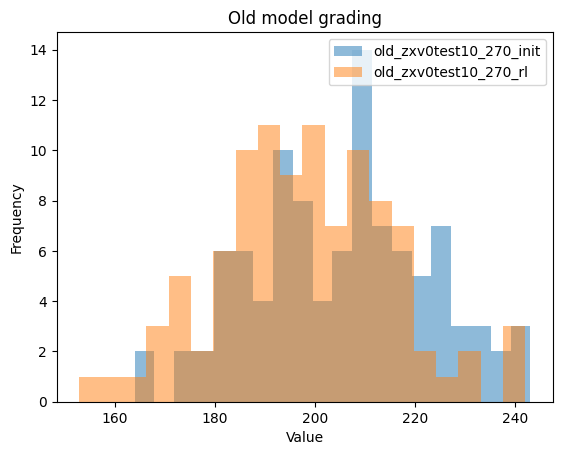

In [2]:
old_zxv0test_10_270_init = [221, 191, 204, 225, 217, 211, 211, 186, 218, 164, 195, 175, 223, 203, 201, 193, 189, 215, 184, 228, 218, 183, 225, 197, 190, 232, 211, 198, 220, 243, 231, 188, 180, 204, 209, 239, 209, 210, 203, 213, 211, 210, 206, 196, 192, 213, 197, 209, 231, 226, 193, 226, 218, 187, 210, 193, 219, 210, 241, 225, 182, 212, 192, 195, 212, 197, 180, 235, 212, 185, 204, 184, 210, 224, 217, 177, 211, 222, 209, 173, 185, 199, 226, 235, 181, 195, 198, 194, 212, 200, 198, 238, 181, 221, 205, 193, 178, 242, 165, 207]
old_zxv0test_10_270_rl = [221, 185, 189, 196, 217, 210, 207, 186, 211, 164, 190, 174, 209, 189, 185, 192, 189, 204, 183, 212, 200, 177, 201, 197, 190, 209, 211, 184, 211, 219, 214, 188, 172, 197, 209, 229, 207, 199, 203, 202, 199, 202, 197, 196, 190, 213, 196, 190, 231, 207, 186, 185, 200, 184, 199, 172, 219, 210, 241, 217, 182, 198, 187, 185, 212, 193, 167, 207, 195, 182, 188, 183, 204, 216, 214, 177, 201, 216, 209, 153, 175, 191, 226, 217, 170, 195, 198, 189, 204, 199, 194, 238, 173, 220, 205, 188, 169, 242, 160, 201]
old_zxv0_10_270_init = [198, 222, 233, 177, 195, 199, 200, 189, 207, 205, 204, 217, 220, 197, 209, 202, 201, 190, 247, 225, 219, 195, 218, 201, 214, 213, 202, 220, 210, 224, 197, 196, 172, 202, 210, 207, 217, 217, 200, 190, 221, 188, 205, 224, 197, 200, 176, 192, 195, 210, 197, 227, 214, 201, 241, 176, 185, 224, 197, 223, 225, 218, 204, 206, 198, 192, 216, 215, 211, 219, 231, 207, 197, 215, 209, 225, 201, 184, 217, 184, 215, 195, 176, 206, 232, 207, 195, 205, 233, 191, 208, 211, 192, 189, 211, 217, 184, 223, 201, 218]
old_zxv0_10_270_rl = [196, 191, 204, 158, 189, 193, 196, 181, 182, 199, 197, 193, 208, 174, 188, 183, 195, 176, 219, 197, 196, 175, 199, 184, 194, 206, 192, 213, 194, 203, 178, 188, 169, 186, 207, 189, 201, 201, 187, 190, 198, 172, 186, 199, 185, 179, 166, 179, 180, 196, 195, 205, 194, 183, 226, 176, 167, 220, 189, 209, 202, 203, 191, 188, 179, 175, 200, 192, 192, 194, 210, 180, 186, 191, 208, 204, 196, 179, 203, 166, 196, 173, 162, 199, 212, 193, 195, 188, 198, 178, 197, 199, 178, 176, 193, 199, 184, 208, 183, 191]


plt.hist(old_zxv0test_10_270_init, bins=20, alpha=0.5, label='old_zxv0test_10_270_init')
plt.hist(old_zxv0test_10_270_rl, bins=20, alpha=0.5, label='old_zxv0test_10_270_rl')
plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Old model grading')
plt.show()

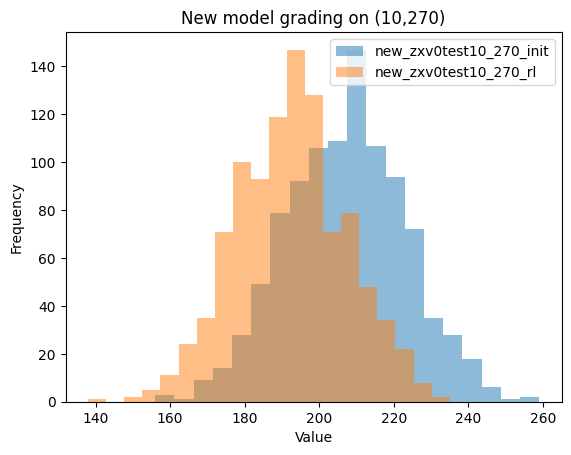

In [3]:
with open('./grading_data/riu_pretrained_gates/initial_stats_stopping_10x270.json') as f:
    new_zxv0test_10_270_init = json.load(f)
with open('./grading_data/riu_pretrained_gates/rl_stats_stopping_10x270.json') as f:
    new_zxv0test_10_270_rl = json.load(f)

plt.hist(new_zxv0test_10_270_init['gates'], bins=20, alpha=0.5, label='new_zxv0test_10_270_init')
plt.hist(new_zxv0test_10_270_rl['gates'], bins=20, alpha=0.5, label='new_zxv0test_10_270_rl')
plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('New model grading on (10,270)')
plt.show()

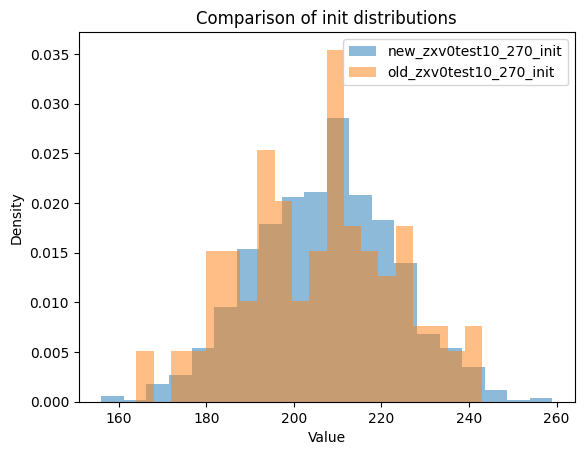

In [4]:
plt.hist(new_zxv0test_10_270_init['gates'], bins=20, alpha=0.5, label='new_zxv0test_10_270_init', density=True)
plt.hist(old_zxv0test_10_270_init, bins=20, alpha=0.5, label='old_zxv0test_10_270_init', density=True)
plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of init distributions')
plt.show()

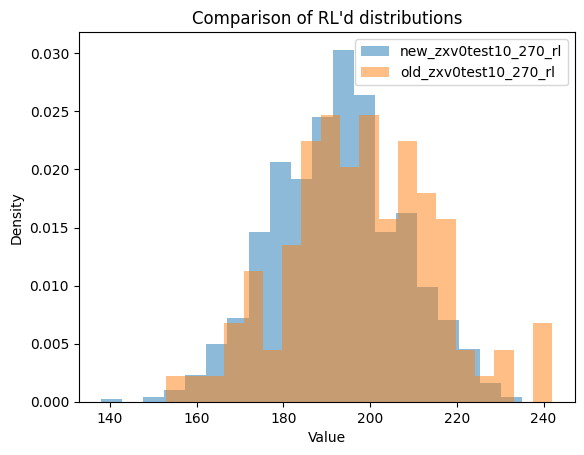

In [5]:
plt.hist(new_zxv0test_10_270_rl['gates'], bins=20, alpha=0.5, label='new_zxv0test_10_270_rl', density=True)
plt.hist(old_zxv0test_10_270_rl, bins=20, alpha=0.5, label='old_zxv0test_10_270_rl', density=True)
plt.legend(loc='upper right')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Comparison of RL\'d distributions')
plt.show()

In [6]:
buf = [-5, -6, -2, -6, -3, -5, -6, -9, -5, -5, 0, -1, -3, -2, -4, -9, -1, -9, -2, -6, -3, -6, -9, -3, -3, 0, -6, -6, 0, -7, -3, 0, -3, -2, -1, -1, -5, -3, -14, 0, -11, -8, -9, -6, -7, -1, -3, -4, 0, -3, 0, -1, -3, -3, -8, 0, -7, 0, -13, -6, -8, -3, -2, -3, 0, -10, -5, 0, -13, -2, 0, -7, -6, -1, -7, -5, -17, -3, -4, 0, -6, -2, -4, -6, 0, -7, -3, 0, -3, 0, -12, -7, -4, 0, -4, -3, -7, -3, -4, -3, -6, -3, -12, 0, -3, -9, 0, -7, -3, -3, -6, -8, 0, -6, 0, 0, 0, -8, 0, -3, 0, -6, -5, -7, -3, -3, 0, 0, -4, -6, -5, -4, 0, -3, -8, -2, -12, -6, 0, 0, -6, 0, -2, -3, -9, -2, 0, -10, -7, -9, -1, -3, -11, 0, -1, -7, -5, -3, -1, -9, 0, -9, -3, -6, -5, -8, -4, 0, 0, -8, 0, -3, -5, 0, -10, -6, -3, -7, -9, -3, -3, -4, -3, -6, -4, -3, -4, 0, -3, -6, -3, -8, -4, -12, -3, -7, 0, -5, -5, -10, -6, -2, -9, -2, -6, 0, 0, -2, 0, 0, -8, -2, 0, 0, -8, 0, -9, -1, -3, -1, -4, -5, -8, -6, -6, -1, -6, -4, -6, -9, 0, -3, -3, 0, -12, 0, 0, 0, 0, 0, -3, -6, -3, -6, -9, -4, 0, -6, 0, -3, -1, -1, -6, -3, -3, -8, -3, -3, 0, -3, -3, 0, -6, 0, -3, 0, 0, -2, -5, -3, -6, -3, 0, -9, -11, 0, -3, 0, -2, 0, 0, -5, 0, -5, -6, -2, -1, -4, 0, 0, -6, 0, -3, -7, -3, -6, -3, -2, -2, -2, 0, 0, -10, -6, -6, -3, 0, -6, -3, -6, -1, -4, 0, 0, -1, 0, 0, -3, 0, 0, -5, -3, -9, -3, -5, 0, -2, 0, -5, 0, -6, -3, 0, -2, -6, 0, 0, -9, -8, -3, 0, -3, -12, 0, 0, -5, -3, -3, -2, 0, -4, 0, -5, -3, -5, 0, -2, -10, -5, -5, -1, -3, 0, -10, -1, -3, -6, -3, -2, 0, -1, -3, 0, -5, -3, -1, -5, -8, -8, 0, -4, 0, 0, -4, -6, -6, -3, 0, 0, -5, -3, -3, -5, 0, -1, -1, -7, -1, -5, -4, -10, 0, -11, -6, -3, 0, -3, -2, -14, -9, -3, -5, -3, -4, 0, -10, -5, -6, -7, 0, 0, 0, 0, -4, -8, -9, -6, -3, -6, 0, -12, -5, 0, -5, -3, -1, -8, -6, -12, -10, 0, -6, -8, -2, -3, 0, -8, 0, -3, 0, 0, 0, -3, 0, 0, 0, -4, -8, -3, 0, -1, -6, 0, 0, -6, -13, 0, -7, 0, -1, -6, -3, -3, -4, -4, 0, -1, -5, -4, -15, -1, 0, -8, -3, -5, -6, 0, -6, -3, -7, -7, -8, -11, -9, 0, 0, 0, -2, -8, -8, 0, 0, 0, -3, 0, 0, -3, -5, 0, -9, 0, -2, -3, -2, 0, -15, -2, -3, 0, -6, -3, -8, -3, -1, -3, -3, 0, 0, -13, 0, -3, -5, 0, 0, -10, -3, -3, -6, -5, 0, 0, -3, -3, 0, -12, 0, -9, -5, -4, -1, -6, -6, 0, -7, -6, -3, -1, -3, -2, -3, -3, -4, 0, -3, 0, -6, -6, 0, -5, 0, -9, 0, -6, 0, -3, -4, -5, -3, -9, -5, -6, -3, -10, -3, -2, 0, -6, -2, -6, 0, 0, -5, -3, -3, -5, -7, -1, -2, -21, -3, -12, 0, -8, -6, 0, 0, 0, 0, 0, -9, -4, -10, -6, 0, 0, -3, 0, -5, -4, 0, -4, -7, 0, 0, -7, -5, 0, -5, -3, -6, 0, 0, -10, -12, 0, -6, -2, -10, -6, 0, -2, 0, -8, -3, -3, -1, 0, -3, -3, -8, 0, -3, -3, -4, 0, -1, -12, -6, -8, -3, -3, -3, 0, -1, -3, -6, -4, -3, -5, -6, 0, -5, 0, -7, -3, 0, 0, -1, -7, -2, -3, -4, -5, -1, -7, -2, -6, 0, 0, -3, -1, 0, -5, -5, -3, -3, 0, -1, -3, 0, -3, -6, -6, 0, 0, -8, 0, -4, -8, -3, 0, -6, -6, 0, 0, -5, 0, -2, -14, -3, -7, -1, -4, -12, 0, 0, 0, -3, -3, -4, 0, -3, -3, 0, 0, 0, 0, 0, -3, -6, 0, -6, 0, -3, -6, -4, -9, -3, -7, -2, -3, -3, -3, -4, 0, 0, -2, -9, -2, 0, -3, -9, -9, -11, -1, 0, -6, -3, -3, -3, 0, -3, -6, 0, -3, -14, -6, -3, 0, 0, -3, -6, 0, -6, -3, -1, 0, -3, -3, 0, -2, -6, -3, -3, -8, -5, -6, -12, -6, -6, -3, -1, -2, -3, -7, -4, -9, -3, -9, 0, -11, 0, -3, -5, -12, -7, -6, -1, -8, -6, -1, 0, -13, -2, -7, 0, -6, -7, -1, -1, 0, -3, -12, -3, -9, -3, -6, -3, -3, -4, 0, -2, -7, 0, -3, 0, -7, 0, 0, -8, -4, 0, 0, -3, -3, -2, -5, -11, -5, -3, -6, -6, 0, -3, -3, 0, -6, 0, -10, 0, -5, -2, -4, 0, -3, -8, 0, -12, 0, -8, -2, -4, -6, -9, 0, -3, 0, -3, -3, 0, -3, -6, -11, -1, -3, -3, 0, -8, 0, 0, -3, -4, 0, -9, 0, 0, 0, 0, -2, -6, -6, 0, 0, -7, -5, -3, -6, -1, -8, -2, 0, -6, 0, -7, -8, -6, -6, -3, -6, -2, 0, -3, 0, -6, -5, 0, -9, -9, 0, -3, -4, 0, -6, 0, -6, -3, -4, 0, -1, -8, -3, -5, -3, -3, -4, -8, -7, -1, -2, -3, -8, -1, -3, -3, -6, -12, -3, -3, -3, -6, -4, -6, -7, -3, -7, 0, 0, -1, 0, -3, -3, -4, -4, 0, -4, -7, -9, -2, -8, -6, -9, 0, -6, 0, 0, -3, -3, 0, -6, 0, ]
np.mean(buf)

-3.687

In [6]:
layers = ['global_attention_critic.gate_nn.0.weight', 'global_attention_critic.gate_nn.0.bias', 'global_attention_critic.gate_nn.2.weight', 'global_attention_critic.gate_nn.2.bias', 'global_attention_critic.gate_nn.4.weight', 'global_attention_critic.gate_nn.4.bias', 'global_attention_critic.nn.0.weight', 'global_attention_critic.nn.0.bias', 'global_attention_critic.nn.2.weight', 'global_attention_critic.nn.2.bias', 'critic_gnn.module_0.att', 'critic_gnn.module_0.bias', 'critic_gnn.module_0.lin_l.weight', 'critic_gnn.module_0.lin_l.bias', 'critic_gnn.module_0.lin_r.weight', 'critic_gnn.module_0.lin_r.bias', 'critic_gnn.module_0.lin_edge.weight', 'critic_gnn.module_2.att', 'critic_gnn.module_2.bias', 'critic_gnn.module_2.lin_l.weight', 'critic_gnn.module_2.lin_l.bias', 'critic_gnn.module_2.lin_r.weight', 'critic_gnn.module_2.lin_r.bias', 'critic_gnn.module_2.lin_edge.weight', 'critic_gnn.module_4.att', 'critic_gnn.module_4.bias', 'critic_gnn.module_4.lin_l.weight', 'critic_gnn.module_4.lin_l.bias', 'critic_gnn.module_4.lin_r.weight', 'critic_gnn.module_4.lin_r.bias', 'critic_gnn.module_4.lin_edge.weight', 'critic_gnn.module_6.att', 'critic_gnn.module_6.bias', 'critic_gnn.module_6.lin_l.weight', 'critic_gnn.module_6.lin_l.bias', 'critic_gnn.module_6.lin_r.weight', 'critic_gnn.module_6.lin_r.bias', 'critic_gnn.module_6.lin_edge.weight', 'critic_gnn.module_8.att', 'critic_gnn.module_8.bias', 'critic_gnn.module_8.lin_l.weight', 'critic_gnn.module_8.lin_l.bias', 'critic_gnn.module_8.lin_r.weight', 'critic_gnn.module_8.lin_r.bias', 'critic_gnn.module_8.lin_edge.weight', 'actor_gnn.module_0.att', 'actor_gnn.module_0.bias', 'actor_gnn.module_0.lin_l.weight', 'actor_gnn.module_0.lin_l.bias', 'actor_gnn.module_0.lin_r.weight', 'actor_gnn.module_0.lin_r.bias', 'actor_gnn.module_0.lin_edge.weight', 'actor_gnn.module_2.att', 'actor_gnn.module_2.bias', 'actor_gnn.module_2.lin_l.weight', 'actor_gnn.module_2.lin_l.bias', 'actor_gnn.module_2.lin_r.weight', 'actor_gnn.module_2.lin_r.bias', 'actor_gnn.module_2.lin_edge.weight', 'actor_gnn.module_4.att', 'actor_gnn.module_4.bias', 'actor_gnn.module_4.lin_l.weight', 'actor_gnn.module_4.lin_l.bias', 'actor_gnn.module_4.lin_r.weight', 'actor_gnn.module_4.lin_r.bias', 'actor_gnn.module_4.lin_edge.weight', 'actor_gnn.module_6.att', 'actor_gnn.module_6.bias', 'actor_gnn.module_6.lin_l.weight', 'actor_gnn.module_6.lin_l.bias', 'actor_gnn.module_6.lin_r.weight', 'actor_gnn.module_6.lin_r.bias', 'actor_gnn.module_6.lin_edge.weight', 'actor_gnn.module_8.att', 'actor_gnn.module_8.bias', 'actor_gnn.module_8.lin_l.weight', 'actor_gnn.module_8.lin_l.bias', 'actor_gnn.module_8.lin_r.weight', 'actor_gnn.module_8.lin_r.bias', 'actor_gnn.module_8.lin_edge.weight', 'actor_gnn.module_10.weight', 'actor_gnn.module_10.bias', 'actor_gnn.module_12.weight', 'actor_gnn.module_12.bias', 'critic_ff.0.weight', 'critic_ff.0.bias', 'critic_ff.2.weight', 'critic_ff.2.bias', 'critic_ff.4.weight', 'critic_ff.4.bias']
gpu_one_step =  [[-3.336879217386013e-09, 2.4285961686132396e-08], [-6.51925802230835e-08, 2.4105710849653406e-07], [-4.249613994034007e-10, 1.4863071662318816e-08], [0.0, 0.0], [-2.5014742277562618e-08, 7.426594805792774e-08], [0.0, 100000000000000], [1.3380559721554164e-05, 6.908291834406555e-05], [3.320660107419826e-05, 0.00013631253386847675], [1.9347251509316266e-05, 7.929601997602731e-05], [4.0591927245259285e-05, 0.00013193250924814492], [-7.294584065675735e-07, 2.5621704480727203e-05], [1.949623037944548e-05, 9.8145887022838e-05], [4.372308467281982e-06, 3.0994789995020255e-05], [1.904407690744847e-05, 9.822466381592676e-05], [-1.2090261236608058e-07, 1.8327649513594224e-06], [-1.2422678992152214e-06, 9.632591172703542e-06], [-4.1439005826759967e-07, 5.5348273235722445e-06], [2.013694029301405e-07, 5.095318101666635e-06], [9.388019861944485e-06, 0.00010832521365955472], [4.8352862904721405e-06, 4.6964840294094756e-05], [9.136972948908806e-06, 0.00010834528802661225], [-1.9040385268453974e-08, 3.0581369969695515e-07], [-1.566804712638259e-07, 1.8515585225031828e-06], [-5.2173469100580405e-08, 1.059139663084352e-06], [-2.422893885523081e-07, 1.312906988459872e-06], [6.2379131122725084e-06, 0.00013116333866491914], [2.1605751499009784e-06, 5.169439464225434e-05], [6.20400533080101e-06, 0.00013121412484906614], [1.4955872984501184e-08, 1.563391833769856e-07], [2.149317879229784e-07, 1.336774857918499e-06], [7.167303550659199e-08, 7.706600513301964e-07], [9.66247171163559e-09, 3.8716302697139326e-07], [9.998648238251917e-06, 0.0001202480198116973], [-4.7539015213260427e-07, 3.9121416193665937e-05], [1.0004761861637235e-05, 0.0001202443745569326], [7.155449566198513e-10, 6.260505891475532e-09], [1.7811544239521027e-08, 8.429759645878221e-08], [5.975986816508794e-09, 4.896567418199993e-08], [3.3993273973464966e-08, 1.2199144805435935e-07], [-1.2187192623969167e-05, 0.00013029317779000849], [-1.911392018882907e-06, 5.105025047669187e-05], [-1.2172909919172525e-05, 0.0001302951277466491], [-6.904201654833741e-10, 1.6147147618994495e-08], [-1.6298145055770874e-08, 2.0450222848467092e-07], [-5.432715166620028e-09, 1.1707500391366921e-07], [2.043659333139658e-05, 0.00013487871910911053], [-2.311661228304729e-05, 0.00017445678531657904], [-6.04023307460011e-06, 0.00011576613178476691], [-2.8647598810493946e-05, 0.00017605099128559232], [-5.444780981633812e-08, 2.9252705644466914e-05], [2.629007212817669e-06, 8.585039176978171e-05], [8.100123523036018e-07, 3.7358273402787745e-05], [-7.950107828946784e-06, 5.470529504236765e-05], [-1.0076169928652234e-05, 0.00018328058649785817], [6.639938874286599e-07, 0.00012535045971162617], [-9.940238669514656e-06, 0.0001836502633523196], [-9.581010544934543e-07, 7.152368198148906e-06], [-7.3468254413455725e-06, 3.453977114986628e-05], [-1.3272074284031987e-06, 1.3351421330298763e-05], [-3.207824192941189e-06, 1.8582779375719838e-05], [-5.358265480026603e-05, 0.00015150083345361054], [-2.715355731197633e-05, 0.00012114184210076928], [-5.389743819250725e-05, 0.00015226595860440284], [4.2961193003066e-07, 5.6515505093557294e-06], [1.7007550923153758e-06, 2.7968173526460305e-05], [3.064572808852972e-07, 1.158173199655721e-05], [-2.247688826173544e-07, 1.1231248208787292e-05], [-1.8609176549944095e-05, 0.00014510552864521742], [-1.2759972378262319e-05, 9.750179742695764e-05], [-1.6520541976206005e-05, 0.00014583664597012103], [2.6539959208093933e-07, 1.9387819065741496e-06], [3.608351107686758e-06, 1.6105543181765825e-05], [6.102151814957324e-07, 6.51559548714431e-06], [-4.708999767899513e-07, 3.901855507137952e-06], [-8.316404091601726e-06, 0.00016047766257543117], [-3.1872791623754892e-06, 9.510580275673419e-05], [-8.126560715027153e-06, 0.00016049160331021994], [-3.897022793353244e-08, 7.717500807302713e-07], [-6.763730198144913e-07, 7.87883618613705e-06], [-1.1266092769801617e-07, 3.184244633303024e-06], [2.1283835849317256e-06, 9.830297494772822e-05], [-3.2343086786568165e-07, 4.956845077686012e-05], [7.461174391210079e-06, 0.00014247966464608908], [7.450580596923828e-08, 100000000000000], [8.755978342378512e-06, 7.564749103039503e-05], [2.4070130166364834e-05, 0.00012969219824299216], [-4.50110383098945e-06, 9.22946710488759e-05], [-1.2480042641982436e-05, 0.0001599531533429399], [0.00012451439397409558, 9.800244879443198e-05], [0.0002000965178012848, 100000000000000], ]
cpu_one_step =  [[-9.00151064797683e-09, 8.50858157264156e-08], [-1.2275995686650276e-07, 6.367604328261223e-07], [8.2800966083596e-10, 2.1116775883456285e-08], [1.1408701539039612e-08, 6.453736034472968e-08], [-5.675246939063072e-09, 8.981921695294659e-08], [9.313225746154785e-10, 100000000000000], [1.0679268598323688e-05, 6.747512088622898e-05], [3.0000486731296405e-05, 0.00014044970157556236], [4.068293037562398e-06, 7.926270336611196e-05], [7.558286597486585e-06, 0.0001333374239038676], [7.713795639574528e-06, 3.608553743106313e-05], [1.6139627405209467e-05, 0.00010416580335004255], [4.957127202942502e-06, 3.061887764488347e-05], [1.70590246852953e-05, 0.00010437633318360895], [2.9978599602742406e-09, 2.457504933772725e-06], [2.365268301218748e-07, 1.196914763568202e-05], [7.920122158111553e-08, 6.837580713181524e-06], [3.4057848097290844e-07, 3.823337010544492e-06], [1.7056361684808508e-05, 9.266164852306247e-05], [5.790801424154779e-06, 3.299177478766069e-05], [1.696066465228796e-05, 9.257801139028743e-05], [-1.2917780622956343e-08, 2.623599471007765e-07], [-1.3505632523447275e-07, 1.6626572687528096e-06], [-4.481504944919834e-08, 9.521308470539225e-07], [2.5173358153551817e-07, 9.676637091615703e-07], [1.8422397261019796e-05, 0.00010854792344616726], [4.410980636748718e-06, 3.841898433165625e-05], [1.8259568605571985e-05, 0.00010857387678697705], [-1.1892822726622398e-08, 1.0178485609912968e-07], [-1.809530658647418e-07, 8.336390919794212e-07], [-6.041955202817917e-08, 4.834962510358309e-07], [3.479362931102514e-08, 3.1727452665109013e-07], [7.646926860616077e-06, 0.0001275489921681583], [2.709347654672456e-06, 5.594019967247732e-05], [7.651018677279353e-06, 0.00012754886120092124], [1.4388206182047725e-09, 1.2454629327862676e-08], [1.9674189388751984e-08, 9.634888442633383e-08], [6.581103662028909e-09, 5.65280942055324e-08], [2.0605511963367462e-08, 1.586930125085928e-07], [2.742658762144856e-05, 0.00012579752365127206], [8.582772352383472e-06, 5.443990812636912e-05], [2.7426343876868486e-05, 0.00012579737813211977], [-1.4229044609237462e-09, 1.154489304155959e-08], [-2.444721758365631e-08, 1.1427376733763595e-07], [-8.129670270307088e-09, 6.718261147398152e-08], [-1.3481389032676816e-05, 0.00013802405737806112], [-1.5449864804395474e-05, 0.00017945606668945402], [-5.903182682232e-06, 0.00011190655641257763], [-1.4819052012171596e-05, 0.00017967994790524244], [-8.164286100509344e-07, 2.8620821467484348e-05], [-1.3821296306559816e-05, 8.305937080876902e-05], [-2.388577968304162e-06, 3.412115256651305e-05], [-4.4424086809158325e-07, 8.118838013615459e-05], [3.86961291951593e-05, 0.00016538394265808165], [2.4527373170712963e-05, 0.00011846832057926804], [4.7343113692477345e-05, 0.00016529443382751197], [3.3058342978620203e-06, 1.6260835764114745e-05], [1.837067975429818e-05, 5.0846199883380905e-05], [3.2092018500406994e-06, 2.2039710529497825e-05], [-6.149813998490572e-06, 3.575093433028087e-05], [-2.715266600716859e-05, 0.00016073419828899205], [-1.1238067600061186e-05, 0.00010050080163637176], [-2.6873487513512373e-05, 0.00016062323993537575], [6.590605607925681e-07, 5.030672582506668e-06], [6.924968147359323e-06, 3.29270405927673e-05], [1.1554305956451572e-06, 1.3522524568543304e-05], [-9.003269951790571e-07, 2.3903265173430555e-05], [1.1739521141862497e-05, 0.00015066060586832464], [2.7447574666439323e-06, 9.927889914251864e-05], [1.4488512533716857e-05, 0.00015112712571863085], [1.2634816926038184e-07, 2.4785408641037066e-06], [9.44986823014915e-07, 1.800532845663838e-05], [1.5986006474122405e-07, 7.245043434522813e-06], [1.4069955796003342e-06, 6.489107363449875e-06], [6.211349045770476e-06, 0.0001383319468004629], [3.5679738630278734e-06, 8.991540380520746e-05], [5.528003384824842e-06, 0.00013841591135133058], [-3.336150911081859e-08, 3.555412320110918e-07], [-6.835616659373045e-07, 3.8208195292099845e-06], [-1.1395119514645558e-07, 1.5603777683281805e-06], [2.435758233332308e-06, 7.333288522204384e-05], [6.256683263927698e-06, 3.5365661460673437e-05], [-1.3979297364130616e-05, 0.0001424140646122396], [-5.364418029785156e-07, 100000000000000], [-1.1407108104322106e-05, 7.75958615122363e-05], [-3.5486675187712535e-05, 0.0001352951512672007], [-3.1480226425628643e-06, 0.0001003436918836087], [-6.257425411604345e-06, 0.00014780231867916882], [0.0001061083166860044, 0.00010126647975994274], [0.00020009279251098633, 100000000000000], ]

gpu_one_epoch = [[-6.990410383878043e-08, 9.86760937848885e-07], [-1.5264176909113303e-06, 6.671273695246782e-06], [1.1022810042504716e-07, 9.154887266049627e-07], [7.0329406298697e-07, 3.1854331155045656e-06], [-9.092764230445027e-07, 3.7549366425082553e-06], [0.0, 100000000000000], [-0.00016048201359808445, 0.0052467165514826775], [-0.0006687912391498685, 0.009849055670201778], [-0.0009641669457778335, 0.0050997962243855], [-0.001637716544792056, 0.007591964676976204], [-7.512257434427738e-05, 0.00161316292360425], [-0.0010411342373117805, 0.007075091358274221], [-0.0002997090632561594, 0.002455558395013213], [-0.0010724184103310108, 0.007071902509778738], [-9.24220512388274e-06, 8.910465112421662e-05], [-9.753978520166129e-05, 0.00035448517883196473], [-3.2515159546164796e-05, 0.00020770556875504553], [-4.649977199733257e-05, 0.00019941492064390332], [-0.0021317750215530396, 0.0067379651591181755], [-0.0008677024161443114, 0.0034370559733361006], [-0.002131911925971508, 0.006739991717040539], [3.06442871078616e-07, 9.235635843651835e-06], [1.8827849999070168e-06, 4.394079223857261e-05], [6.281576929723087e-07, 2.511345701350365e-05], [6.295114872045815e-06, 4.8058405809570104e-05], [-0.0007444940274581313, 0.006672000978142023], [-0.00021091803500894457, 0.002742631360888481], [-0.0007461139466613531, 0.00667180772870779], [-1.11222675514e-07, 1.326860228800797e-06], [-1.5694822650402784e-06, 9.45689589570975e-06], [-5.2011944262631e-07, 5.454275651572971e-06], [-1.0673720680642873e-06, 1.2766627150995191e-05], [-0.0016668036114424467, 0.007520334329456091], [-0.00036486252793110907, 0.003227619919925928], [-0.0016671324847266078, 0.007519955281168222], [3.447853487159591e-07, 3.0641169814771274e-06], [5.952897481620312e-06, 2.9610971978399903e-05], [1.9856574908772018e-06, 1.715284633974079e-05], [-2.039829269051552e-06, 5.83164091949584e-06], [-6.156810559332371e-05, 0.00730934226885438], [-0.00010436422599013895, 0.0034864547196775675], [-6.161618512123823e-05, 0.007309349719434977], [-3.1752733775647357e-10, 8.566416198618754e-08], [-3.4924596548080444e-10, 8.293314408547303e-07], [-1.3581788471661582e-10, 4.809660367754987e-07], [-0.0002807316486723721, 0.00251606572419405], [0.00042475247755646706, 0.0036955666728317738], [1.4738165191374719e-05, 0.0029190792702138424], [0.0002518532855901867, 0.0036659238394349813], [2.809161742334254e-05, 0.0008894330821931362], [3.1620555091649294e-05, 0.0016428851522505283], [3.035437475773506e-05, 0.0008326021488755941], [-0.0008267750963568687, 0.0024924185127019882], [-0.0008895457722246647, 0.0022041581105440855], [-0.0003247220884077251, 0.0022982314694672823], [-0.0008795281173661351, 0.002216117223724723], [2.269115429953672e-05, 0.0002954619994852692], [0.00012711512681562454, 0.0012136263540014625], [2.1957041099085473e-05, 0.0004994583432562649], [-0.0003736285725608468, 0.0010496391914784908], [-0.00034739138209261, 0.001720793079584837], [-0.00022157985949888825, 0.0016578221693634987], [-0.0004882878274656832, 0.0017814069287851453], [-2.1241627109702677e-05, 0.00014972404460422695], [-0.00019487662939354777, 0.0008368353010155261], [-3.327785088913515e-05, 0.00035326488432474434], [-2.9150251066312194e-05, 0.0011114450171589851], [-5.225265340413898e-06, 0.0022695495281368494], [-5.241267353994772e-05, 0.0016387627692893147], [-2.842336834874004e-05, 0.002272312995046377], [-1.1773789083235897e-05, 8.333111327374354e-05], [-0.00014155592361930758, 0.0005461018299683928], [-2.4508013666491024e-05, 0.00023730054090265185], [-1.9024242646992207e-05, 0.0002975114621222019], [-0.0003540153265930712, 0.0016644055722281337], [-3.0731651349924505e-05, 0.0013433308340609074], [-0.0003799038822762668, 0.0016736537218093872], [-1.8223254301119596e-05, 0.00017418460629414767], [-0.00017012498574331403, 0.0009503758046776056], [-2.8354261303320527e-05, 0.00038811250124126673], [-1.3161023161956109e-05, 0.0016750653740018606], [-0.00013163653784431517, 0.0005197539576329291], [-0.0009183421498164535, 0.0026195908430963755], [2.0094215869903564e-05, 100000000000000], [-0.0006850373465567827, 0.004595381673425436], [-0.0020446470007300377, 0.007611366920173168], [-0.000471626000944525, 0.005407032556831837], [-0.001312826294451952, 0.009116744622588158], [0.006696485914289951, 0.007239737082272768], [0.012832477688789368, 100000000000000], ]
cpu_one_epoch = [[1.5148827969824197e-08, 2.498370008652273e-07], [1.784501364454627e-07, 2.022572289206437e-06], [2.0897658714602585e-08, 2.808381793784065e-07], [0.0, 0.0], [-4.4508487917482853e-07, 1.4737912579221302e-06], [0.0, 100000000000000], [-0.000535281898919493, 0.0017362197395414114], [-0.0018249667482450604, 0.0038980511017143726], [-0.0001114214101107791, 0.002408467000350356], [-0.00029068905860185623, 0.004899740219116211], [-0.00012919085565954447, 0.0005618886207230389], [-0.0007284023449756205, 0.0036881384439766407], [-0.00013409534585662186, 0.001183349289931357], [-0.0006661931984126568, 0.003696601139381528], [7.354414265137166e-06, 4.5629803935298696e-05], [7.933622691780329e-05, 0.00019702716963365674], [2.6445602998137474e-05, 0.00011866088607348502], [-2.192202373407781e-06, 3.815939271589741e-05], [-0.00045192879042588174, 0.003877262119203806], [-0.00010243194992654026, 0.0013389004161581397], [-0.00045520850108005106, 0.0038781706243753433], [-4.6432992917289084e-07, 2.8713573101413203e-06], [-4.6307104639709e-06, 1.849474574555643e-05], [-1.5454133972525597e-06, 1.078896275430452e-05], [-1.185726432595402e-07, 1.1162570444867015e-05], [0.0002279779000673443, 0.004089945927262306], [6.0380116337910295e-05, 0.0015214721206575632], [0.00022843299666419625, 0.004089908208698034], [3.7362269722507335e-08, 3.5976228218714823e-07], [5.07221557199955e-07, 2.4397879769821884e-06], [1.672500076210781e-07, 1.4099418876867276e-06], [1.4251418178901076e-07, 4.151066605118103e-06], [0.00017496307555120438, 0.004016529768705368], [4.598551640810911e-06, 0.0014770899433642626], [0.00017505951109342277, 0.004016479942947626], [2.459137249388732e-08, 1.6442990613541042e-07], [4.516332410275936e-07, 1.4640667131970986e-06], [1.500496438211485e-07, 8.682062571097049e-07], [-2.5801273295655847e-07, 1.367011805086804e-06], [-0.00022425442875828594, 0.004418731201440096], [-5.1828505092998967e-05, 0.0014838434290140867], [-0.0002240000612800941, 0.004418869502842426], [2.005526766879484e-08, 1.746271749425432e-07], [4.6874629333615303e-07, 1.7670771512712236e-06], [1.5772336325881042e-07, 1.0365307616666541e-06], [0.00025605037808418274, 0.004338309168815613], [0.0001497956400271505, 0.003576164599508047], [-5.628209328278899e-05, 0.003095608204603195], [0.00023753358982503414, 0.003793480806052685], [5.690853140549734e-05, 0.0010309707140550017], [0.0003781771520152688, 0.0033585538621991873], [5.707806849386543e-05, 0.0013361519668251276], [-0.00021490035578608513, 0.001642744755372405], [0.00016821511962916702, 0.0030758422799408436], [-0.00015779078239575028, 0.0022517177276313305], [0.00012936907296534628, 0.003074818989261985], [-1.8824590370059013e-05, 0.0001762855245033279], [-8.360529318451881e-05, 0.0008083058637566864], [-1.341968891210854e-05, 0.00037204206455498934], [-8.118950063362718e-05, 0.00024225916422437876], [0.00031690840842202306, 0.0018157685408368707], [5.957311805104837e-05, 0.0022302439901977777], [0.00036761106457561255, 0.001815394381992519], [1.7380153849444469e-07, 2.8118540285504423e-05], [5.280773621052504e-06, 0.00030368889565579593], [7.705627353971067e-07, 0.00012957317812833935], [-3.686666241264902e-05, 8.414409967372194e-05], [0.0003411953803151846, 0.0010911269346252084], [0.00015101472672540694, 0.0020980669651180506], [0.0002861603570636362, 0.0011977378744632006], [-7.199219453468686e-06, 5.2453382522799075e-05], [-9.26878274185583e-05, 0.00041472053271718323], [-1.5447649275301956e-05, 0.00017062814731616527], [-1.3226934242993593e-05, 4.411338159115985e-05], [-0.00021236414613667876, 0.0011645311024039984], [-4.171704131294973e-05, 0.0019505445379763842], [-0.00022372239618562162, 0.0011640334269031882], [-1.2783642659996985e-06, 8.612925739726052e-06], [-2.6956666260957718e-05, 8.822756353765726e-05], [-4.492347670748131e-06, 3.694159022415988e-05], [-3.586942330002785e-05, 0.002913483651354909], [7.294959505088627e-05, 0.00032028742134571075], [0.00010670587653294206, 0.005065817851573229], [1.3692304491996765e-05, 100000000000000], [-0.00031146511901170015, 0.0030392673797905445], [-0.000647893117275089, 0.005003985017538071], [-0.0004631197080016136, 0.002854191232472658], [-0.0009320987737737596, 0.00414631050080061], [-0.0026537086814641953, 0.0035819250624626875], [-0.007249236106872559, 100000000000000], ]

for i, (cpu, gpu) in enumerate(zip(cpu_one_epoch, gpu_one_epoch)):
    print(f"{layers[i]}")
    if cpu[0] == 0: continue
    print(f"{(cpu[0]-gpu[0])/cpu[0]:.3f} {(cpu[1]-gpu[1])/cpu[0]:.3f}")


global_attention_critic.gate_nn.0.weight
5.614 -48.646
global_attention_critic.gate_nn.0.bias
9.554 -26.050
global_attention_critic.gate_nn.2.weight
-4.275 -30.369
global_attention_critic.gate_nn.2.bias
global_attention_critic.gate_nn.4.weight
-1.043 5.125
global_attention_critic.gate_nn.4.bias
global_attention_critic.nn.0.weight
0.700 6.558
global_attention_critic.nn.0.bias
0.634 3.261
global_attention_critic.nn.2.weight
-7.653 24.155
global_attention_critic.nn.2.bias
-4.634 9.262
critic_gnn.module_0.att
0.419 8.137
critic_gnn.module_0.bias
-0.429 4.650
critic_gnn.module_0.lin_l.weight
-1.235 9.487
critic_gnn.module_0.lin_l.bias
-0.610 5.067
critic_gnn.module_0.lin_r.weight
2.257 -5.911
critic_gnn.module_0.lin_r.bias
2.229 -1.985
critic_gnn.module_0.lin_edge.weight
2.230 -3.367
critic_gnn.module_2.att
-20.211 73.559
critic_gnn.module_2.bias
-3.717 6.330
critic_gnn.module_2.lin_l.weight
-7.471 20.483
critic_gnn.module_2.lin_l.bias
-3.683 6.287
critic_gnn.module_2.lin_r.weight
1.660 13.

In [ ]:
# reporoducibility
def set_seed(seed):
    """Set seed"""
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)

set_seed(42)
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(10, 10)
        self.act = nn.ReLU()

    def forward(self, x):
        h = self.act(self.l1(x))
        return h

simple_model = SimpleNN()
print(simple_model.state_dict())